# Treinando um *modelo sequencial* de **CLASSIFICAÇÃO**

### Importando Keras

In [2]:
import tensorflow as tf
from tensorflow import keras

### Baixando dados do MNIST Fashion para treinar uma rede

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
print(f"Formato: {X_train_full.shape}")
print(f"Tipos: {X_train_full.dtype}")

Formato: (60000, 28, 28)
Tipos: uint8


### Criando conjunto de validação

O MNIST não cria automaticamente um conjunto de validação. Além disso, vamos usar o gradiente descendente para treinar a rede, logo, precisamos escalonar as características de entrada, vamos dividi-los por 255.0 para ficar na escala entre 0 e 1, isso também o converterá para float:

In [4]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

### Criando o nome das classes, pois não vem com o dataset:

In [5]:
class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Mostrando alguns exemplares:

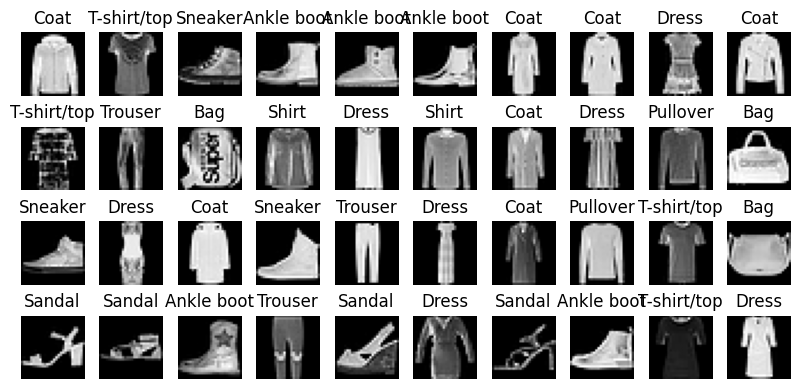

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 10, figsize=(8, 4))
axes = axes.ravel()

for i in range(40):
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].set_title(f'{class_name[y_train[i]]}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Criando o modelo usando sequential API

Explicando o modelo:

**model = keras.models.Sequential()**: é o modelo *sequential* mais simples, constituído somente de uma única pilha de camadas sequencialmente conectadas.

**model.add(keras.layers.Flatten(input_shape=[28,28]))**: Está aqui apenas como uma camada de pré-processamento para converter a entrada em uma camada *1D*, ela calculoa *X.reshape(-1, 1)

**model.add(keras.layers.Dense(300, activation='relu'))**: Adiciona uma camada oculta densa (totalmente conectada) com **300** neurônios com a função de ativação *Relu*. Cada camada *Dense* se encarrega de sua própria matriz de peso, que contém todos os pesos de conexão entre os neurônios e suas entradas. Ela também gerencia um vetor de viés (um por neurônio). Ao receber alguns dados de entrada.

**model.add(keras.layers.Dense(100, activation='relu'))**: Outra camadas densa com ativação *Relu*

**model.add(keras.layers.Dense(10, activation='softmax'))**: Camada de saída *Dense* comn 10 neurônios (um por classe), usando a função de ativação *softmax* (pois as classes são exclusívas)

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

c:\Users\anton\OneDrive\Desktop\RedesNeurais-Basico\environment\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Arquitetura do modelo

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [10]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [11]:
model.get_layer('dense') is hidden1

True

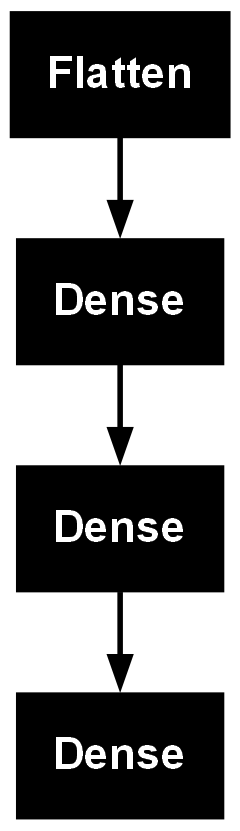

In [12]:
keras.utils.plot_model(model)

### Acessando os parâmetros das camadas, inclui´ndo pesos de conexão e vieses para as camadas Densas:

In [13]:
weights, biases = hidden1.get_weights()

pesos iniciados de forma aleatória, antes do treinamento:

In [14]:
weights

array([[-0.03641046,  0.01243954,  0.05307269, ..., -0.00549184,
        -0.03954055,  0.01203215],
       [-0.01523013, -0.05110458,  0.03699639, ..., -0.07255728,
         0.01758897,  0.05999294],
       [-0.06362774, -0.02772084,  0.05844411, ...,  0.05477682,
        -0.00758607,  0.04746448],
       ...,
       [ 0.06660461, -0.06040126, -0.02625724, ..., -0.05297795,
        -0.01644801, -0.04600901],
       [-0.01709621, -0.00764576,  0.04372539, ..., -0.05151286,
        -0.06097373, -0.05427829],
       [ 0.04685541,  0.05801959, -0.06243066, ..., -0.02475422,
         0.06312147,  0.02325935]], dtype=float32)

In [15]:
weights.shape

(784, 300)

In [16]:
biases.shape

(300,)

# Compilando o modelo

Após a **criação**, precisamos chamar o método *compile()* para especificar a função de perda e o otimizador que será utilizado. Podemos inclusíve passar uma lista de métricas extras a serem calculadas durante o treinamento e a avaliação:

usamos o **sparse_categorical_crossentropy** porquê temos rótulos esparsos (ou seja, para cada instância, existe somente índice de classe-alvo, de 0 a 9, nesse caso), e as classes são exclusivas. Se tivessemos uma probabilidade-alvo por classe para cada instância (como vetores one-hot, por exemplo [0., 0., 0., 1., 0., 0., 0., 0.] para representar a classe 3), então precisaríamos usar o *categorical_crossentropy* e não a perda. Se tivéssemos fazendo uma classificação binária (com um ou mais rótulos binários), usariamos o *sigmoid* (ou seja, a logística) na função de ativação na cadama de saída, em vez da função de ativação *softmax*, e usaríamos a perda *binary_crossentropy*.

**SGD** Significa que treinaremos o modelo empregando um *gradiente descendente estocástico* simples.

In [17]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

### Treinando o modelo

In [18]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6956 - loss: 0.9842 - val_accuracy: 0.8140 - val_loss: 0.5351
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8238 - loss: 0.5047 - val_accuracy: 0.8336 - val_loss: 0.4676
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8467 - loss: 0.4465 - val_accuracy: 0.8506 - val_loss: 0.4321
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8570 - loss: 0.4106 - val_accuracy: 0.8628 - val_loss: 0.4007
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8600 - loss: 0.3969 - val_accuracy: 0.8688 - val_loss: 0.3838
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8656 - loss: 0.3788 - val_accuracy: 0.8730 - val_loss: 0.3698
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8687 - loss: 0.3714 - val_accuracy: 0.8742 - val_loss: 0.3638
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8750 - loss: 0.3524 - 

### Resultados
Como podemos ver, a *accuracy* subiu com o tempo, enquanto a perda desceu (ótimo), e olhando para a validação vemos que a *accuracy* também subiu, enquanto a perda desceu, significa que o nosso modelo está generalizando bem!

# Plotando Resultados

Podemos utilizar o pandas para plotar a curva de aprendizado e observar o comportamento do nosso modelo ao passar das épocas:

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

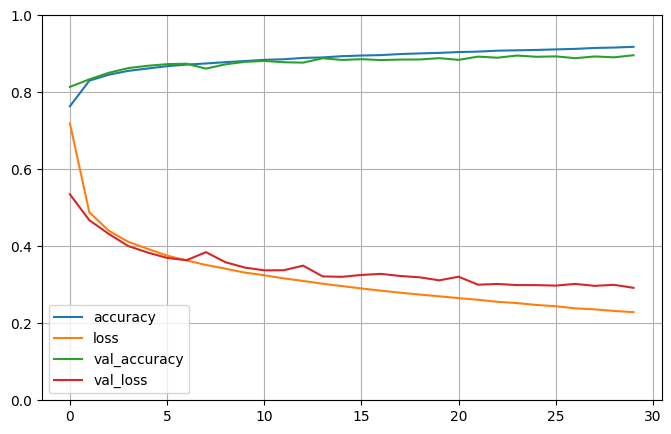

In [20]:
pd.DataFrame(history.history).plot(figsize=(8, 5)) # O fit do nosso modelo gera um histórico que pode ser acessado através da chave "history"
plt.grid(True)
plt.gca().set_ylim(0, 1) # define o intervalo vertical para [0-1]
plt.show()

### Testando resultados com o **conjunto de testes**:

In [21]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8539 - loss: 62.1883


[65.29806518554688, 0.849399983882904]

conjunto de **validação**:
```
Epoch 30/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9196 - loss: 0.2243 - val_accuracy: 0.8948 - val_loss: 0.2925
```
conjunto de **teste**:
```
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8630 - loss: 53.9034
```

vemos que o modelo deu uma pequena **piorada**, normal devido ao treinamento ter sido feito levando o conjunto de validação em consideração.

# Usando o modelo para fazer predições:

In [22]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

podemos ver que cada linha do array seria uma imagem, o predict retorna a probabilidade de cada imagem pertencer a cada classe, nesse caso, o *1* representa "100% de certeza" de que aquela imagem pertence a *x* classe.

podemos retornar somente as **classes**:

In [23]:
import numpy as np
y_classes = np.argmax(y_proba, axis=1)
y_classes

array([9, 2, 1])

In [24]:
np.array(class_name)[y_classes]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

# Visualizando predições:

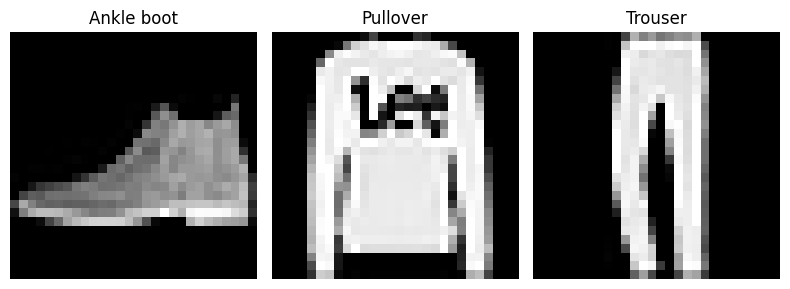

In [25]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(8, 4))
axes = axes.ravel()
for i in range(3):
    axes[i].imshow(X_new[i], cmap='gray')
    axes[i].set_title(f'{class_name[y_classes[i]]}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Treinando um *modelo sequencial* de **REGRESSÃO**

Aqui será usado o *dataset* de *imóveis da **Califórnia***, priemiro, precisamos importa-lo:

In [26]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

escalando as variáveis:

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

criando modelo sequencial:

In [28]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20


c:\Users\anton\OneDrive\Desktop\RedesNeurais-Basico\environment\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9859 - val_loss: 0.8029
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6600 - val_loss: 0.5237
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6171 - val_loss: 0.4835
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4996 - val_loss: 0.4683
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5002 - val_loss: 0.4242
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4444 - val_loss: 0.4566
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4440 - val_loss: 0.4003
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4231 - val_loss: 0.3934
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4850 - val_loss: 0.4085
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4671 - val_loss: 0.3991
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5369 - val_loss: 0.4064
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.

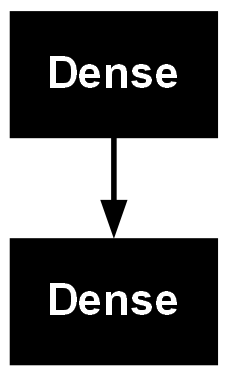

In [29]:
keras.utils.plot_model(model)

avalidando o modelo:

In [30]:
mse_test = model.evaluate(X_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3996  


In [31]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


In [32]:
y_pred

array([[1.4542222],
       [2.8381991],
       [2.8924685]], dtype=float32)

# Rede Neural Não Sequencial

Agora, será utilizado um outro modelo não sequencial, uma rede *Wide Deep*. Ela interliga todas ou parte das entradas diretamente à camada de saída.

essa é a forma que fizemos anteriormente:

In [33]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

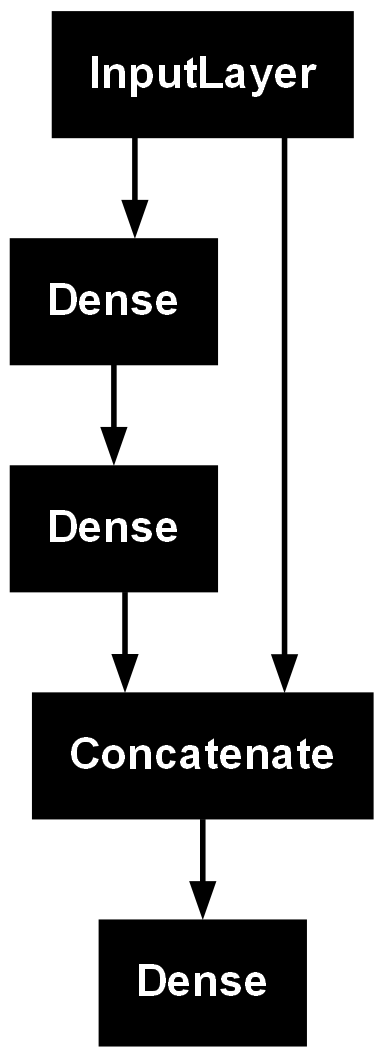

In [34]:
keras.utils.plot_model(model)

### Explicando o código acima

primeiro é criado o objeto input, especificando o tipo de entrada que o modelo terá, incluindo o shape e dtype:
```
input_ = keras.layers.Input(shape=X_train.shape[1:])
```

Criamos uma camanda *Dense* com 30 neurônios, usando a função de ativação *ReLU*, após isso, chamamos como uma função, passando a entrada que foi estipulada acima.
```
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
```

Outra camada oculta, seguindo o mesmo princípio.
```
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
```

É criada a camada concatenate que liga a entrada com a última saída
```
concat = keras.layers.Concatenate()([input_, hidden2])
```

Depois é criada uma camada de saída:
```
output = keras.layers.Dense(1)(concat)
```

Por último, criamos um *Model* keras, especificando quais entradas e saídas utilizar
```
model = keras.Model(inputs=[input_], outputs=[output])
```

### Compilando o modelo

Nesse caso, usaremos ummodelo diferentes caminhos, enviaremos algumas características pelo caminho amplo da rede e outras pelo caminho profundo.
Aqui é um pouco diferente, devemos passar um par de matrizes *X_train_A, X_train_B (uma por entrara)*, o mesmo para a validação e para o teste.

então o código da arquitetura ficará assim:

In [35]:
input_A = keras.layers.Input(shape=[5], name='wode_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [36]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

model.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9255 - val_loss: 1.0797
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0207 - val_loss: 0.8062
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8020 - val_loss: 0.7266
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7074 - val_loss: 0.6790
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6649 - val_loss: 0.6403
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6321 - val_loss: 0.6083
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5887 - val_loss: 0.5821
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5760 - val_loss: 0.5598
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5685 - val_loss: 0.5413
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5442 - val_loss: 0.5265
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5271 - val_loss: 0.5144
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

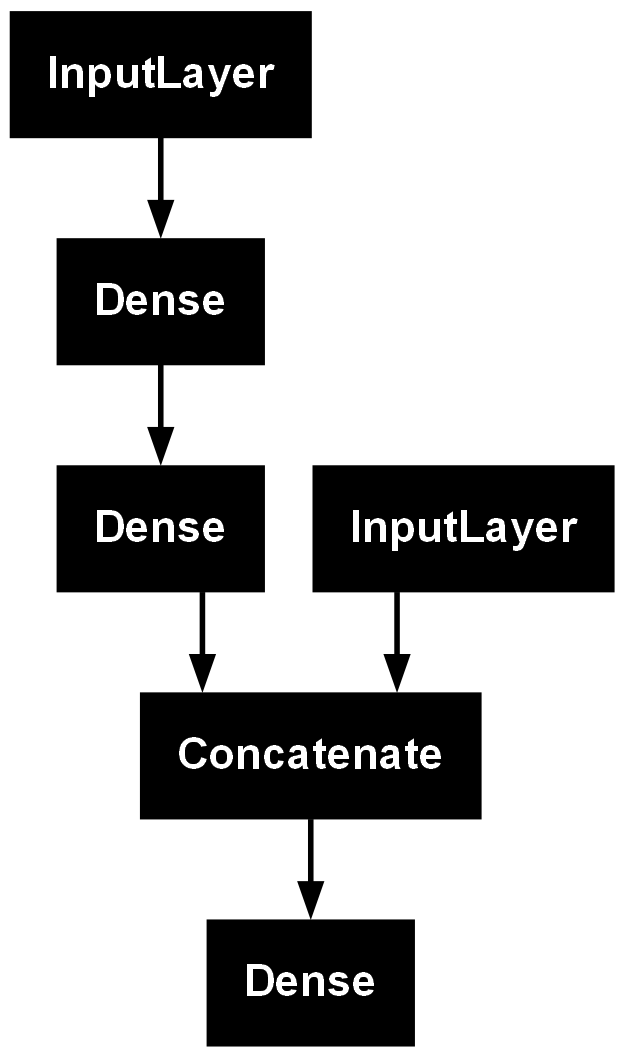

In [37]:
keras.utils.plot_model(model)

# Salvando modelo

In [39]:
model.save('neuralnet_chicago.keras')

# Call Backs

é possível que, ao treinar modelos em grande bases de dados, você queira salvar checkpoints pois o tempo de treinamento é maior do que o tempo que você tem disponível, para isso, usamos o callback para que o treinamento possa criar *checkpoints* durante o processo (também serve como early stopping):

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("neuralnet_chicago.keras", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit((X_train_A, X_train_B), y_train, epochs=200, validation_data=((X_valid_A, X_valid_B), y_valid), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4392 - val_loss: 0.4284
Epoch 2/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4419 - val_loss: 0.4266
Epoch 3/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4290 - val_loss: 0.4254
Epoch 4/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4381 - val_loss: 0.4244
Epoch 5/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4304 - val_loss: 0.4231
Epoch 6/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4173 - val_loss: 0.4218
Epoch 7/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4267 - val_loss: 0.4204
Epoch 8/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4418 - val_loss: 0.4182
Epoch 9/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4390 - val_loss: 0.4175
Epoch 10/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4434 - val_loss: 0.4160
Epoch 11/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4252 - val_loss: 0.4155
Epoch 12/200
363/363 ━━━━━━━━━━━━━━━━━━━━

# TensorBoard

Uma ótima forma de analisar o treinamento do nosso modelo em tempo real, acompanhar métricas e tudo mais, é pelo **TENSORBOARD**, para cria-lo, precisamos treinar o modelo passando esse método como callback:

In [43]:
import os
import time
logdir = os.path.join(os.curdir, "logs")

def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(logdir, run_id)

run_logdir = get_run_logdir()

Isso criará arquivos binários no path criado acima, arquivos que podem ser abertos no servidor local do TensorBoard!

In [45]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit((X_train_A, X_train_B), y_train, epochs=200, validation_data=((X_valid_A, X_valid_B), y_valid), callbacks=[tensorboard_cb])

Epoch 1/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3290 - val_loss: 0.3157
Epoch 2/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3357 - val_loss: 0.3156
Epoch 3/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3244 - val_loss: 0.3160
Epoch 4/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3332 - val_loss: 0.3150
Epoch 5/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3132 - val_loss: 0.3160
Epoch 6/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3191 - val_loss: 0.3149
Epoch 7/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3192 - val_loss: 0.3148
Epoch 8/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3338 - val_loss: 0.3150
Epoch 9/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3352 - val_loss: 0.3146
Epoch 10/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3300 - val_loss: 0.3158
Epoch 11/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3301 - val_loss: 0.3142
Epoch 12/200
363/363 ━━━━━━━━━━━━━━━━━━━━

Agora, basta rodar o seguinte comando no CMD:
```
tensorboard --logdir=./logs --port=6006
```

![image](images/tensorboard.png)

# Aperfeiçoamento de hiperparâmetros

Uma opção é sair testando diversas combinações de parâmetros de forma atuomática e ver qual melhor funciona no conjunto de validação

In [69]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=(8,)):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for _ in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

In [70]:
from scikeras.wrappers import KerasRegressor

In [71]:
keras_reg = KerasRegressor(build_fn=build_model)

In [72]:
# keras_reg.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])
# mse_test = keras_reg.score(X_test, y_test)
# y_pred = keras_reg.predict(X_new)

# Usando RandomizedSearchCV


forma randomica de descobrir as melhores combinações de parâmetros:

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

Não consegui utilizar o RandomizedSearchCV pelo Keras, pelo pouco que pesquiser isso foi removido das versões atuais, mas ainda é possível fazer com XGboost

In [86]:
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2)
}

# rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
# rnd_search_cv.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [78]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_absolute_error

xgb_model = XGBRegressor(random_state=30)
grid_obj_xgb = RandomizedSearchCV(xgb_model,param_distribs, cv=5,n_iter=15,scoring='neg_mean_absolute_error',verbose=5,n_jobs=12)
grid_obj_xgb.fit(X_train, y_train,verbose = 1)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


c:\Users\anton\OneDrive\Desktop\RedesNeurais-Basico\environment\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:44:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_hidden", "n_neurons" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   scoring='neg_mean_absolute_error', verbose=5)

In [ ]:
y_pred_train = grid_obj_xgb.predict(X_train)
y_pred_test = grid_obj_xgb.predict(X_test)

err_xgb_train=mean_absolute_error(y_train, y_pred_train, multioutput='raw_values')

In [83]:
y_pred_train

array([2.0251653, 1.5866402, 1.6397855, ..., 2.4570546, 1.7264287,
       2.8752728], dtype=float32)

In [84]:
y_pred_test

array([1.5393472, 2.9817953, 2.5244381, ..., 2.894456 , 1.6368616,
       1.5745927], dtype=float32)

In [85]:
err_xgb_train

array([0.38612426])